# CatBoost

`pip install catboost`


In [20]:
import os, sys, pathlib

UTILS_FOLDER = 'S00 - Utils'
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from utils import plot_ds
from catboost import CatBoostClassifier

In [22]:
# Read data
iris = datasets.load_iris()

# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
# Model
cat = CatBoostClassifier(n_estimators=100)

Learning rate set to 0.493633
0:	learn: 0.6042063	total: 577us	remaining: 57.2ms
1:	learn: 0.4060534	total: 970us	remaining: 47.5ms
2:	learn: 0.3047512	total: 1.37ms	remaining: 44.2ms
3:	learn: 0.2471369	total: 1.75ms	remaining: 42.1ms
4:	learn: 0.1987653	total: 2ms	remaining: 38ms
5:	learn: 0.1672899	total: 2.38ms	remaining: 37.3ms
6:	learn: 0.1466235	total: 2.78ms	remaining: 36.9ms
7:	learn: 0.1308757	total: 3.13ms	remaining: 36ms
8:	learn: 0.1156146	total: 3.5ms	remaining: 35.4ms
9:	learn: 0.1047826	total: 3.86ms	remaining: 34.7ms
10:	learn: 0.0937903	total: 4.23ms	remaining: 34.2ms
11:	learn: 0.0834648	total: 4.61ms	remaining: 33.8ms
12:	learn: 0.0762269	total: 4.97ms	remaining: 33.3ms
13:	learn: 0.0710345	total: 5.4ms	remaining: 33.2ms
14:	learn: 0.0680791	total: 5.84ms	remaining: 33.1ms
15:	learn: 0.0654258	total: 6.21ms	remaining: 32.6ms
16:	learn: 0.0630251	total: 6.57ms	remaining: 32.1ms
17:	learn: 0.0587160	total: 6.93ms	remaining: 31.6ms
18:	learn: 0.0551027	total: 7.3ms	rem

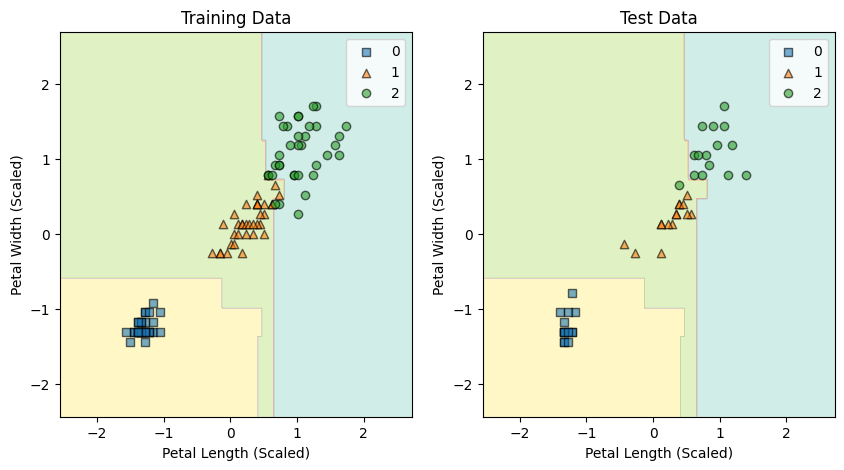

In [24]:
# Training
cat.fit(X_train_std, y_train)

# Prediction (Notice the flatten command)
y_pred = cat.predict(X_test_std).flatten() # Return a 1-D array

# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

# Plot decision regions
plot_ds(X_train_std, X_test_std, y_train, y_test, cat)

In [25]:
y_pred.flatten()

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0], dtype=int64)